**Problem Statement**

1.    **Determine whether a person makes over 50K a year.**

**The data is taken from kaggle which is about Salary Prediction.**

**Link (https://www.kaggle.com/code/jayanandenm/salary-prediction)**

** *1. Categorical Attributes* **
 * **workclass**: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  -  Individual work category  
 * **education**: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  -  Individual's highest education degree  
 * **marital-status**: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  -  Individual marital status  
 * **occupation**: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  -  Individual's occupation  
 * **relationship**: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  -  Individual's relation in a family   
 * **race**: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  -  Race of Individual   
 * **sex**: (categorical) Female, Male.
 * **native-country**: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  -  Individual's native country   

** *2. Categorical Attributes* **
 * **age**: continuous.
  -  Age of an individual  
 * **education-num**: number of education year, continuous.
  -  Individual's year of receiving education
 * **fnlwgt**: final weight, continuous. 
 * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.
 * **capital-gain**: continuous.
 * **capital-loss**: continuous.
 * **hours-per-week**: continuous.
  -  Individual's working hour per week   

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("salary.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df1=df.copy()          

**Creates a copy of the orginal dataframe**

In [5]:
df1.shape

(32561, 15)

**The given dataset has 32561 Rows and 15 Columns.**

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Top 5 Rows in the dataset**

In [8]:
df1.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


**Last 5 rows in the dataset**

In [9]:
df1.isna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**is.na() command returns False if null value is present there and it return true if value is present**

In [10]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [11]:
df1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

**Returns How many Null Values are present in each column.In this dataset there are no null values.**

In [12]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


**Gives a statistical view about the data**

# PRE-PROCESSING

In [13]:
df1['workclass'].value_counts()   

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

**From this we can see that null values in this data are represented by ?. we will check for all columns which have null values by value_counts() method.**

In [14]:
# replace '?' by NaN
df1['workclass'].replace(' ?', np.nan, inplace=True)

In [15]:
df1['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [16]:
df1['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [17]:
df1['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [18]:
# replace ' ?' by Nan
df1['occupation'].replace(' ?', np.nan, inplace=True)

In [19]:
df1['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [20]:
df1['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [21]:
df1['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [22]:
df1['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [23]:
# replace ' ?' by NaN
df1['native-country'].replace(' ?', np.nan, inplace=True)

In [24]:
df1['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

From this we can see that given data is imbalanced.

In [25]:
df1['salary']= df1['salary'].map({' <=50K': 0, ' >50K': 1})

In [26]:
#Converting  the target column into numerical classes.
df1['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

# **Handling of Null Values**

In [27]:
df1.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

**From this we can see that there are missing values in 3 Columns**

In [28]:
# display the rows where 'workclass' is NaN
rows_with_workclass_na = df1[df1['workclass'].isnull()]
rows_with_workclass_na.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,0
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,0
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,0


**In this we can see that wherever the 'workclass' feature missing, the 'occupation' feature is also missing. Hence, 'occupation' is missing at random.**

**We will fill the null by most frequent value i.e(mode) **

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df1[['workclass','occupation','native-country']])
df1[['workclass','occupation','native-country']] = imputer.transform(df1[['workclass','occupation','native-country']])

In [31]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

**No more null values in the data**

#  **Vizualization**

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [33]:
sns.set(rc={'figure.figsize': [20, 10]}, font_scale=1.2)

# SALARY

<AxesSubplot: xlabel='salary', ylabel='count'>

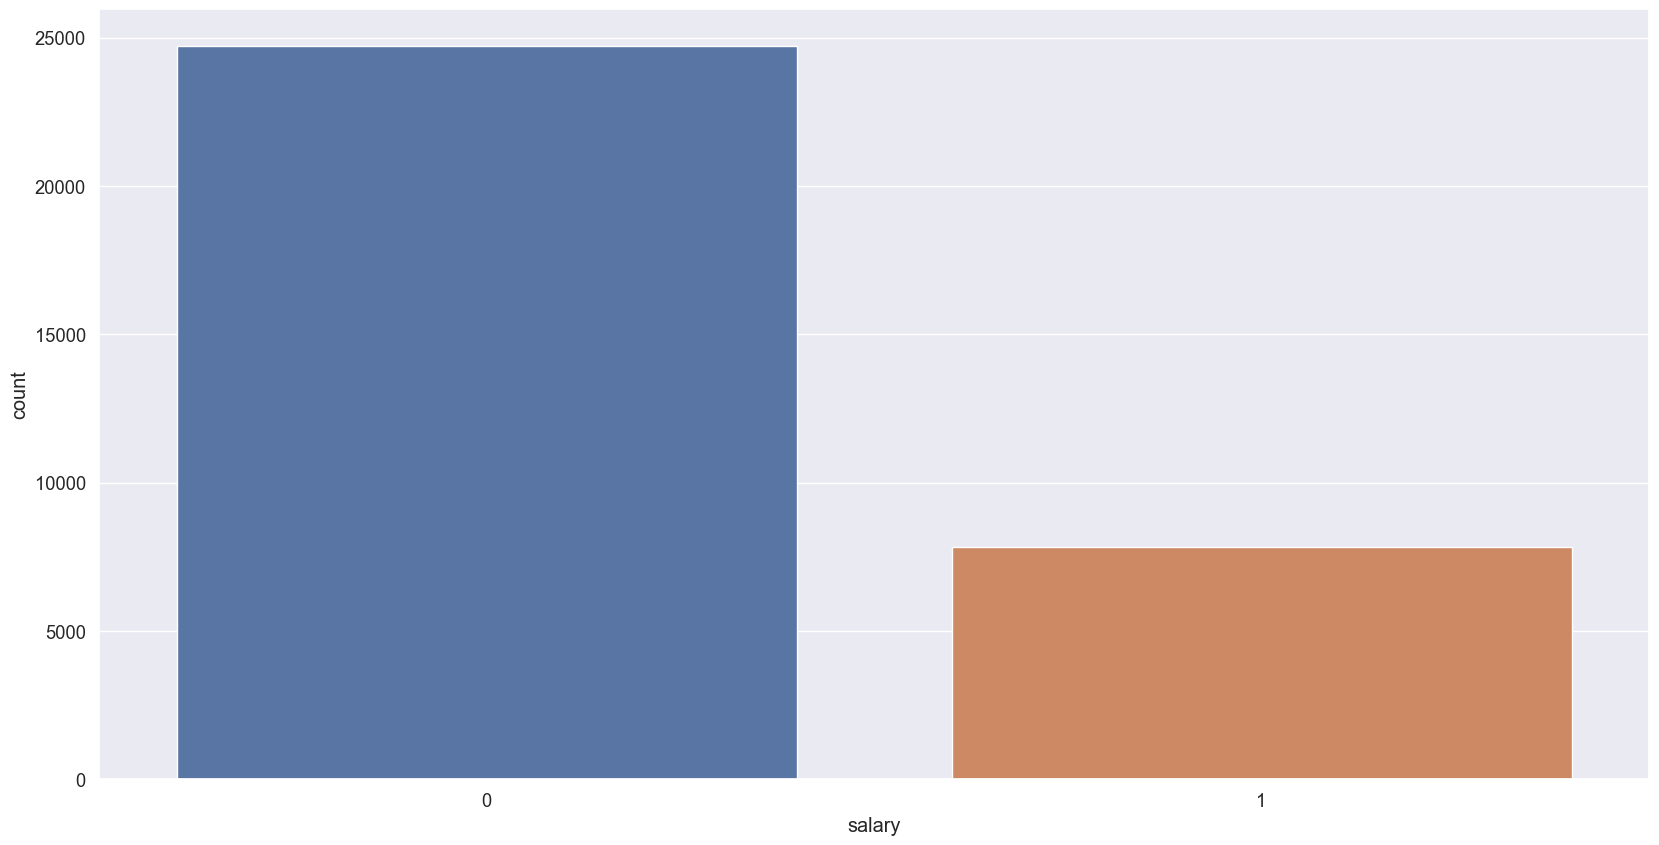

In [34]:
sns.countplot(data=df1, x="salary")

In [35]:
print('-> Total No. of records : {}\n'.format(len(df1)))

print('-> Number of people making more that >50K : {}%\n'.format(
    round((len(df1[df1['salary']==1])/32561)*100, 2)))

print('-> Number of people making less than or equal to <=50K : {}%'.format(
    round((len(df1[df1['salary']==0])/32561)*100, 2)))

-> Total No. of records : 32561

-> Number of people making more that >50K : 24.08%

-> Number of people making less than or equal to <=50K : 75.92%


**The distribution of the target column, we would find that the people with less than 50K annual income are 75.92% and the no. of people making more than 50K is 24.08%,so it's clear that the dataset is unbalanced.**

# AGE VS SALARY

In [36]:
def draw_boxen_plot(feature, hue=None):
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca()
    sns.boxenplot(data=df1, x='salary', y=feature, ax=ax, hue=hue)
    sns.set_style('whitegrid')
    ax.set_title('Salary VS '+feature.title())

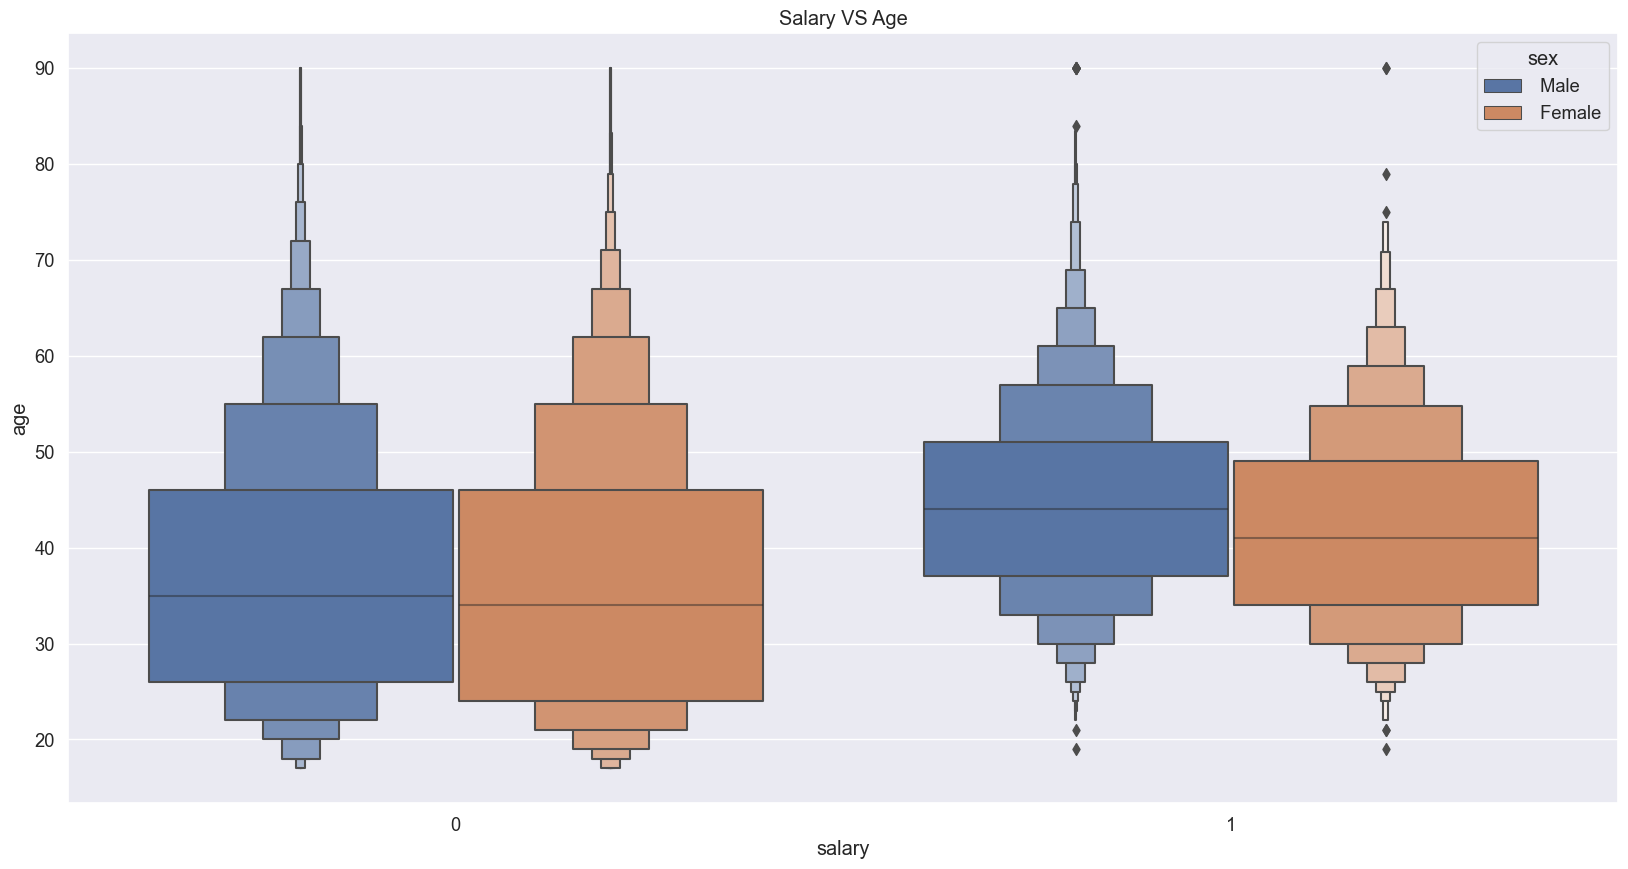

In [37]:
# Salary VS Age
draw_boxen_plot('age', 'sex')

**Most of employees below 35 have lower income, and 46-50 have higher income. and some more.**

# Hours-per-week VS Salary

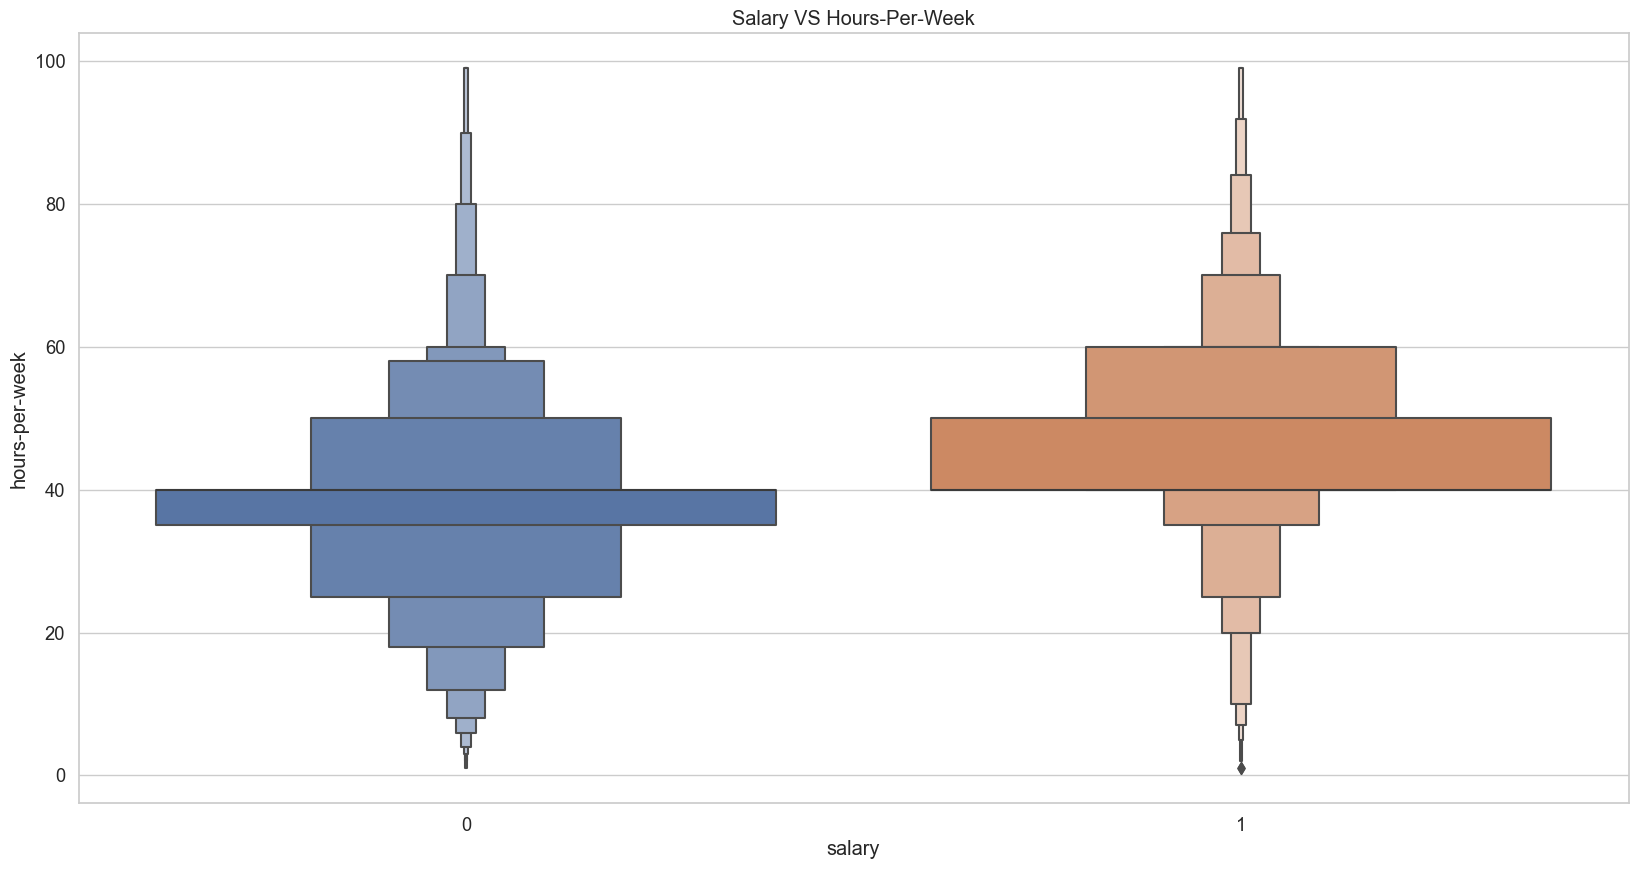

In [38]:
# hours-per-week VS Salary
draw_boxen_plot('hours-per-week')

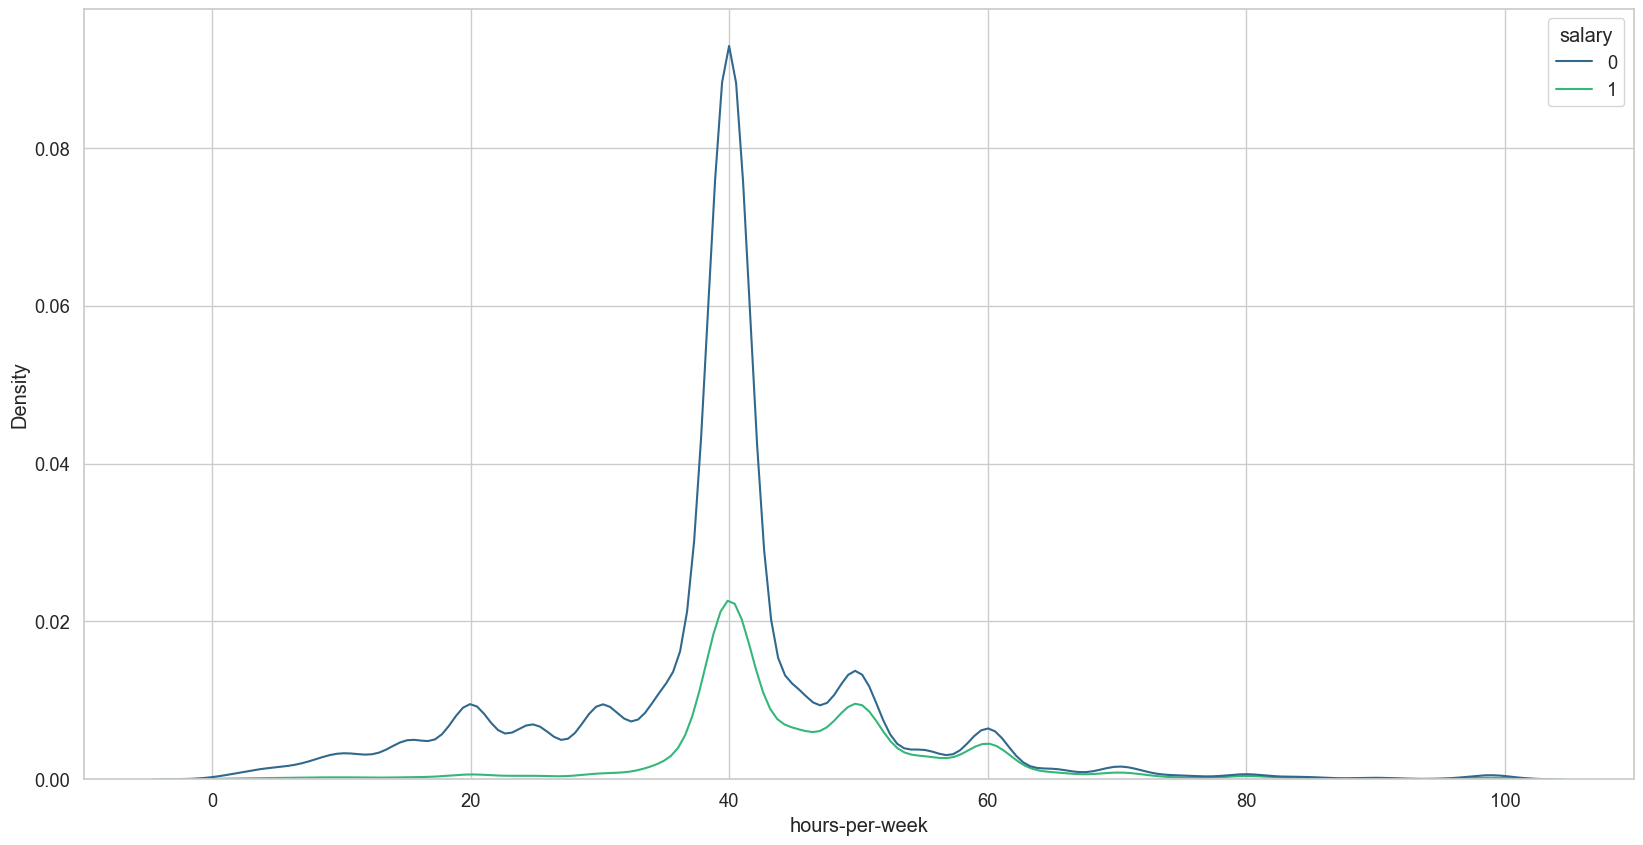

In [39]:
sns.kdeplot(data=df1, x='hours-per-week', hue='salary', palette='viridis');

**Employees who work over 40 hours per week are paid more than those who work bellow 40 hours per week. Or most of employees who have >=50k income work over 40 hours weekly.**

## Gender

Text(0.5, 1.0, 'Salary Distribution')

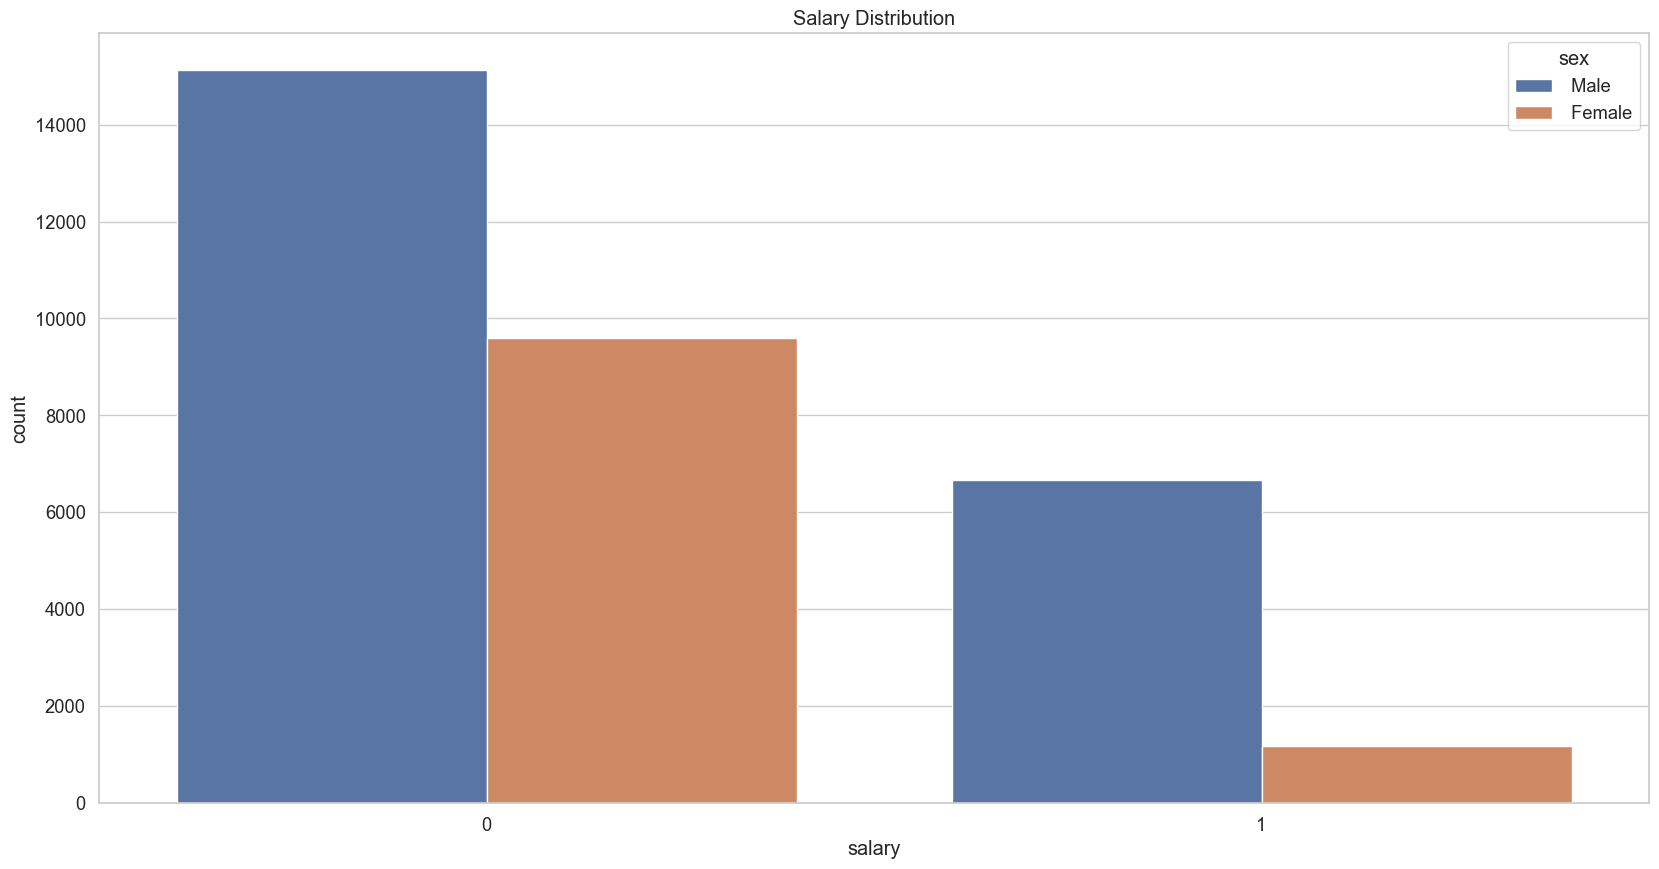

In [40]:
SalDis = sns.countplot(x=df1['salary'], hue=df1['sex'])
SalDis.set_title('Salary Distribution')

**There are very few women having an income of greater than 50k in comparison with men.**

# Workclass VS Salary

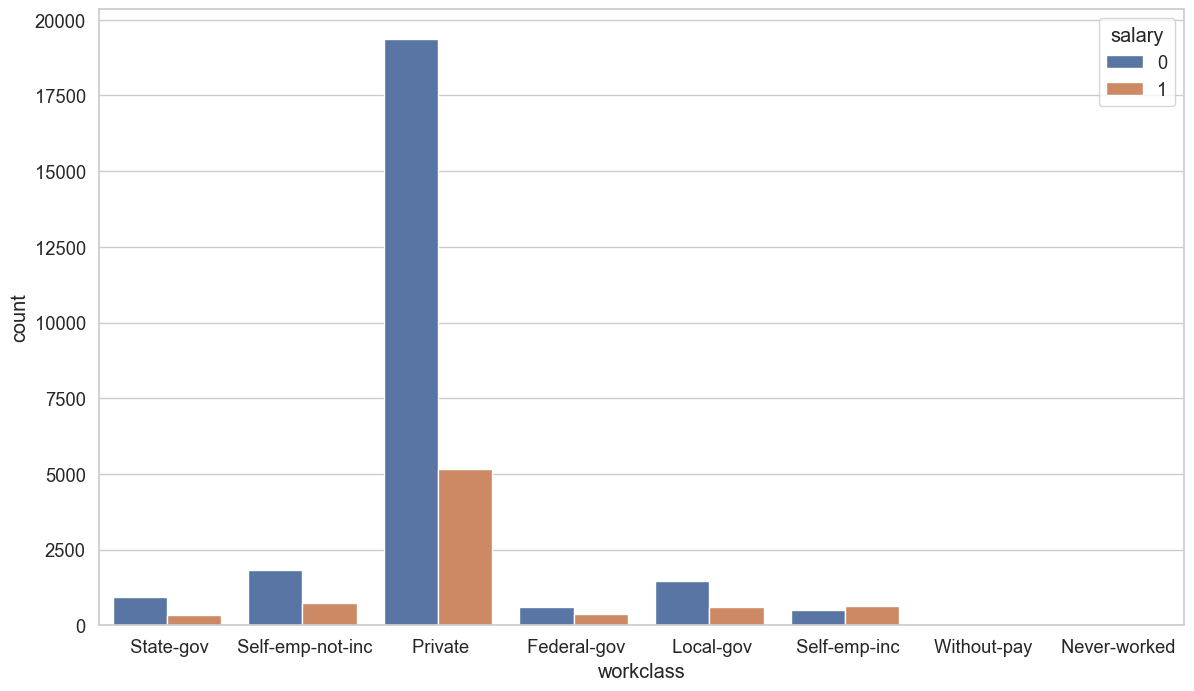

In [41]:
plt.figure(figsize=(14,8))
sns.countplot(data =df1, x = 'workclass', hue = 'salary')
plt.show()

In [42]:
df1['workclass'].unique()

workclass_labels = df1.groupby(['workclass'])['salary'].mean().sort_values().index
print(workclass_labels)

workclass_labels2={k:i for i,k in enumerate(workclass_labels,0)}
print(workclass_labels2)

df1['workclass'] = df1['workclass'].map(workclass_labels2)

Index([' Never-worked', ' Without-pay', ' Private', ' State-gov',
       ' Self-emp-not-inc', ' Local-gov', ' Federal-gov', ' Self-emp-inc'],
      dtype='object', name='workclass')
{' Never-worked': 0, ' Without-pay': 1, ' Private': 2, ' State-gov': 3, ' Self-emp-not-inc': 4, ' Local-gov': 5, ' Federal-gov': 6, ' Self-emp-inc': 7}


**Only in Self-emp-inc the number of >=50k income is higher than <50k income**

## Education and Education Number

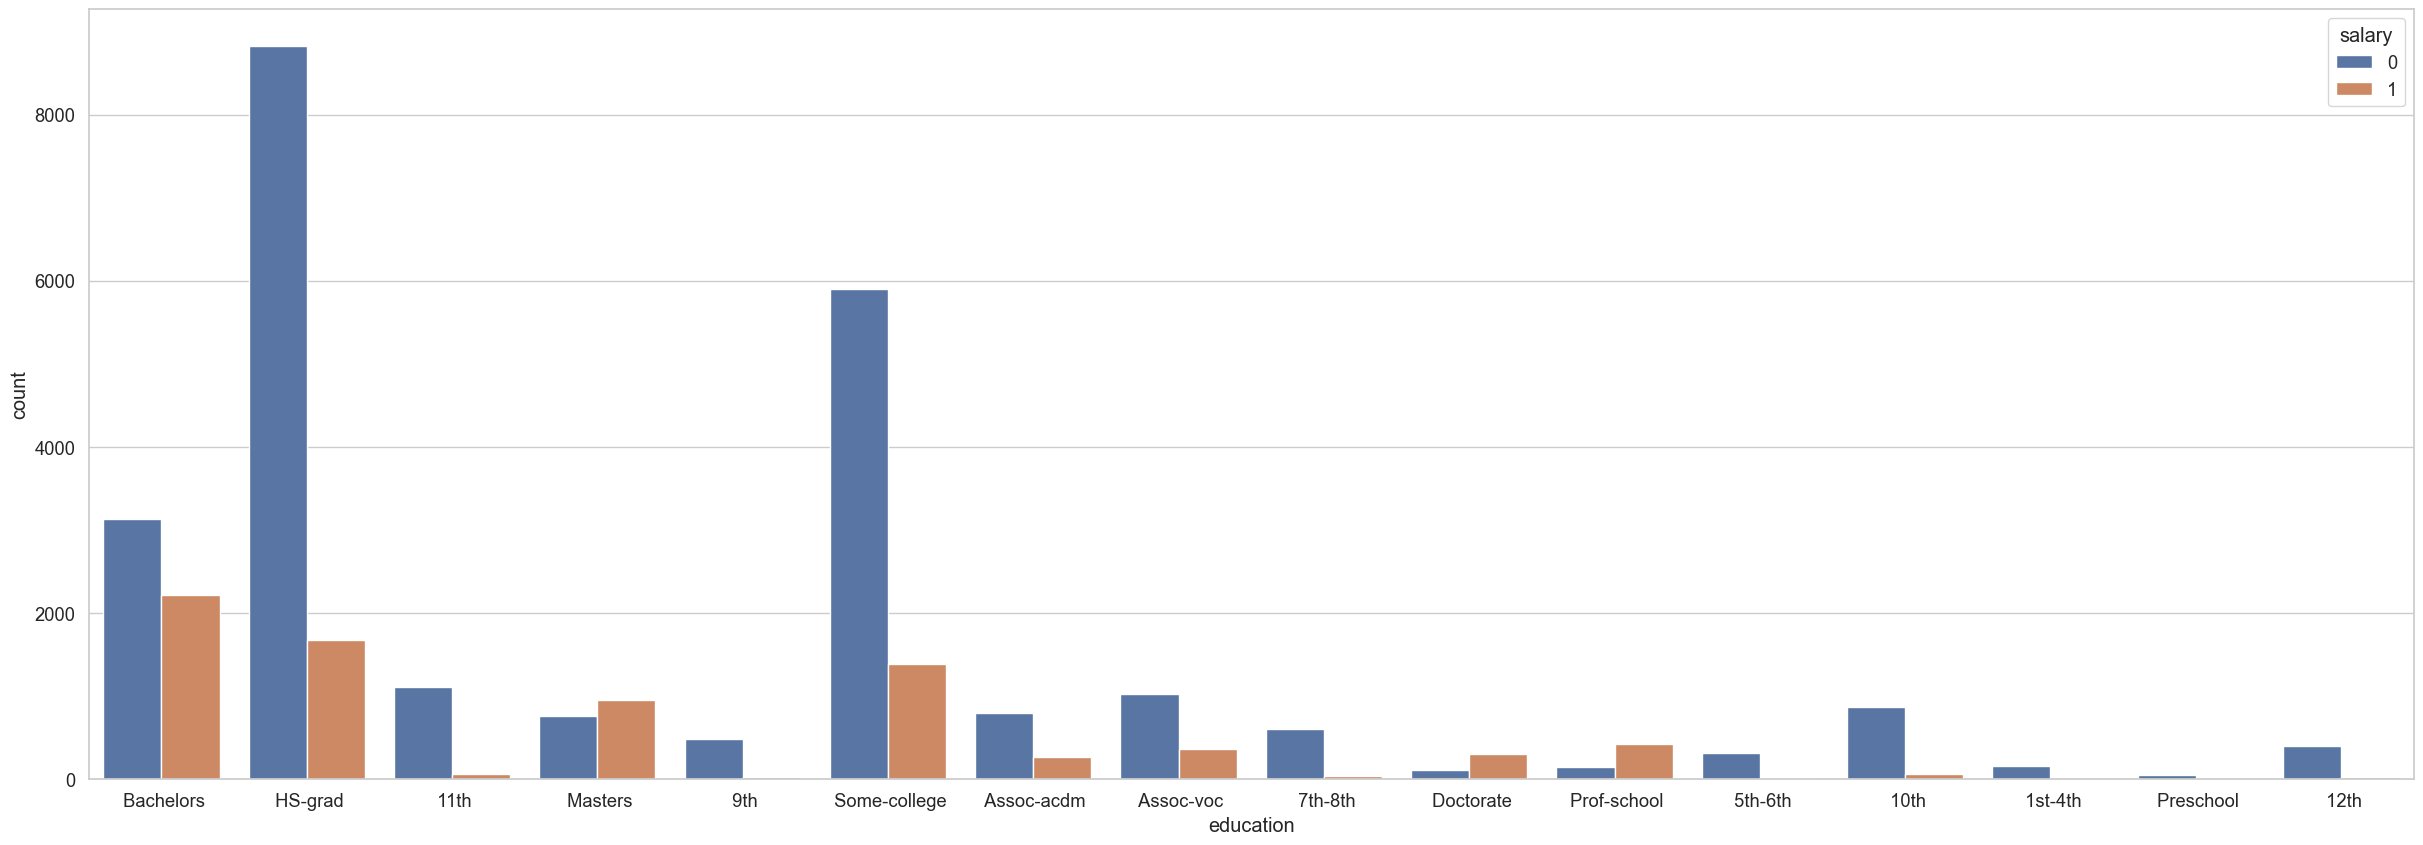

In [43]:
plt.figure(figsize=(30,10))
sns.countplot(data =df1 , x = 'education', hue = 'salary')
plt.show()

**Most of employees who are in masters, doctorate or prof-shcool categories have higher income. (>=50k)
Most of HS-grads have an income of <50k, and many more...**

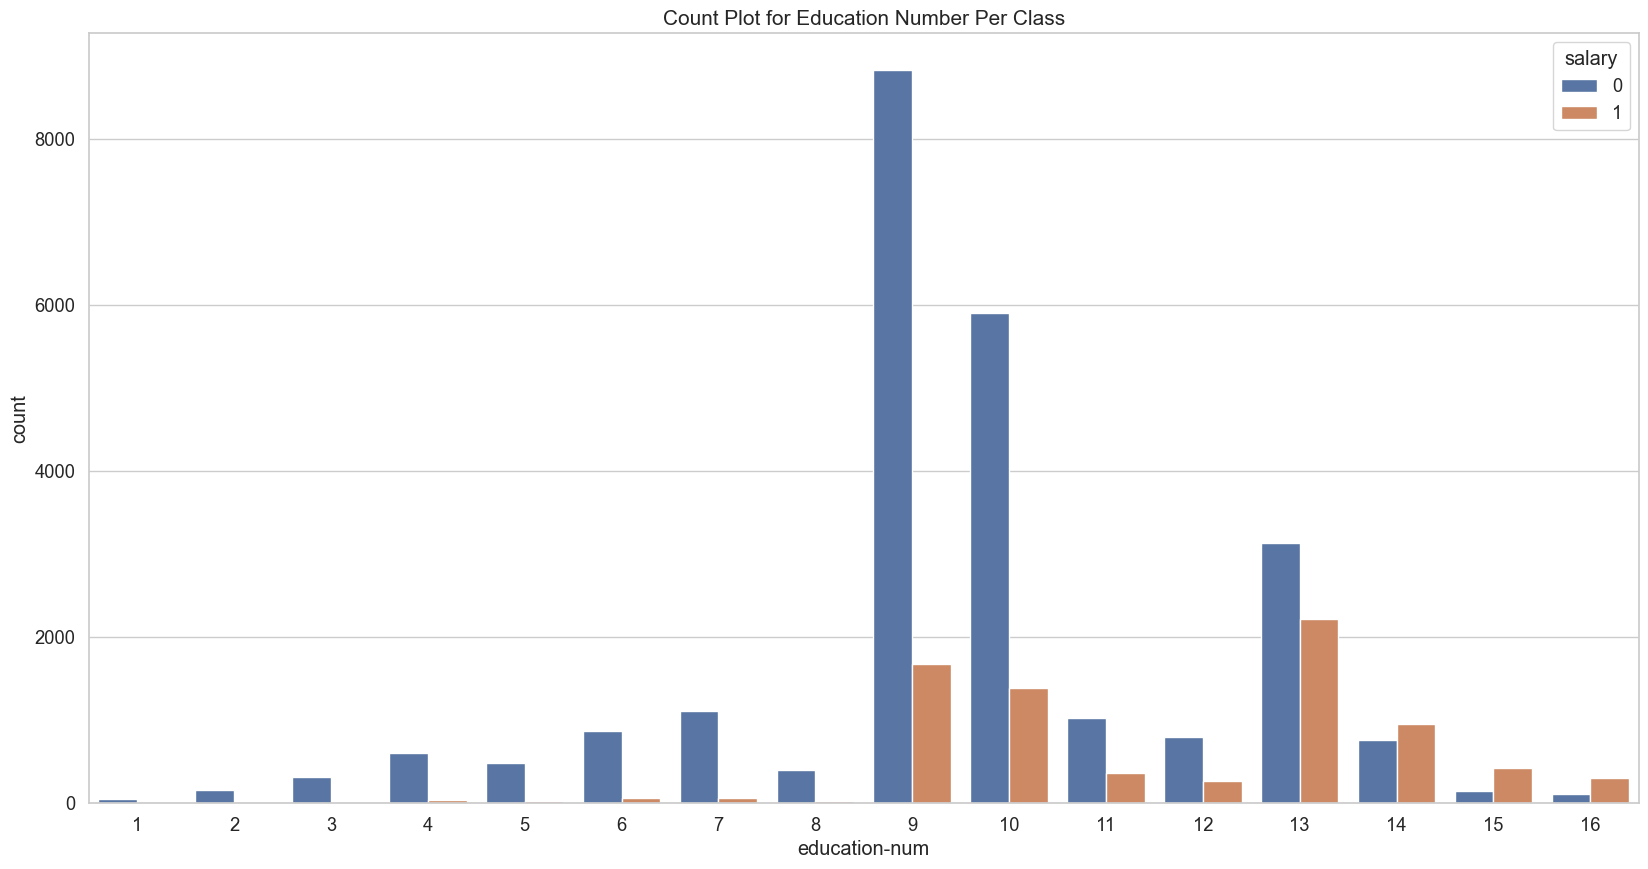

In [44]:
sns.countplot(x='education-num', data=df1, hue='salary')
plt.title("Count Plot for Education Number Per Class", fontsize = 15)
plt.subplots_adjust(hspace = 0.35)

In [45]:
education_classes = df1['education'].unique()
for educ_class in education_classes:
    print("{}, the Education Number is {}".
          format(educ_class,df1[df1['education'] == educ_class]['education-num'].unique()))

 Bachelors, the Education Number is [13]
 HS-grad, the Education Number is [9]
 11th, the Education Number is [7]
 Masters, the Education Number is [14]
 9th, the Education Number is [5]
 Some-college, the Education Number is [10]
 Assoc-acdm, the Education Number is [12]
 Assoc-voc, the Education Number is [11]
 7th-8th, the Education Number is [4]
 Doctorate, the Education Number is [16]
 Prof-school, the Education Number is [15]
 5th-6th, the Education Number is [3]
 10th, the Education Number is [6]
 1st-4th, the Education Number is [2]
 Preschool, the Education Number is [1]
 12th, the Education Number is [8]


In [46]:
# education & education number column are just the same, so I am dropping education number column.
df1.drop(labels='education-num', axis=1, inplace=True)

* *From the analysis above, It's clear that **education** & **education number** column are **just the same.** so I am dropping education number column.*

* *And In this dataset Most number of people are high school graduates with 9 to 10 years of education.* 

# RACE

Text(0.5, 1.0, 'Salary ratio for each race')

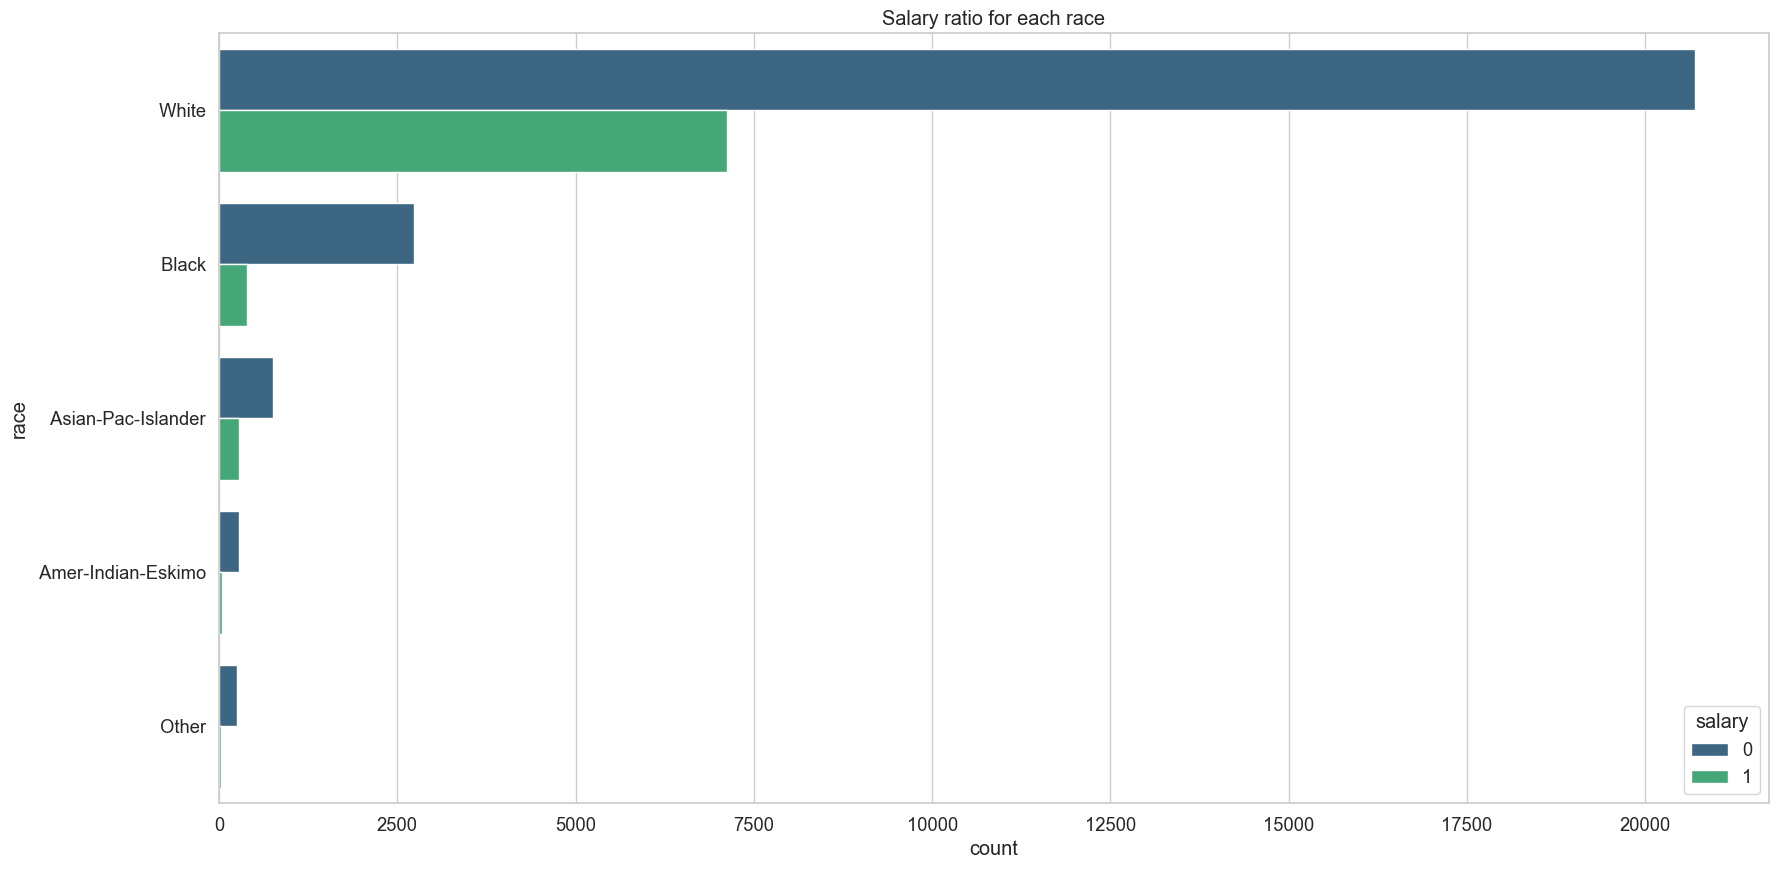

In [47]:
ax = sns.countplot(data=df1, y='race', hue='salary', palette='viridis')
ax.set_title('Salary ratio for each race')

# MARITIAL STATUS

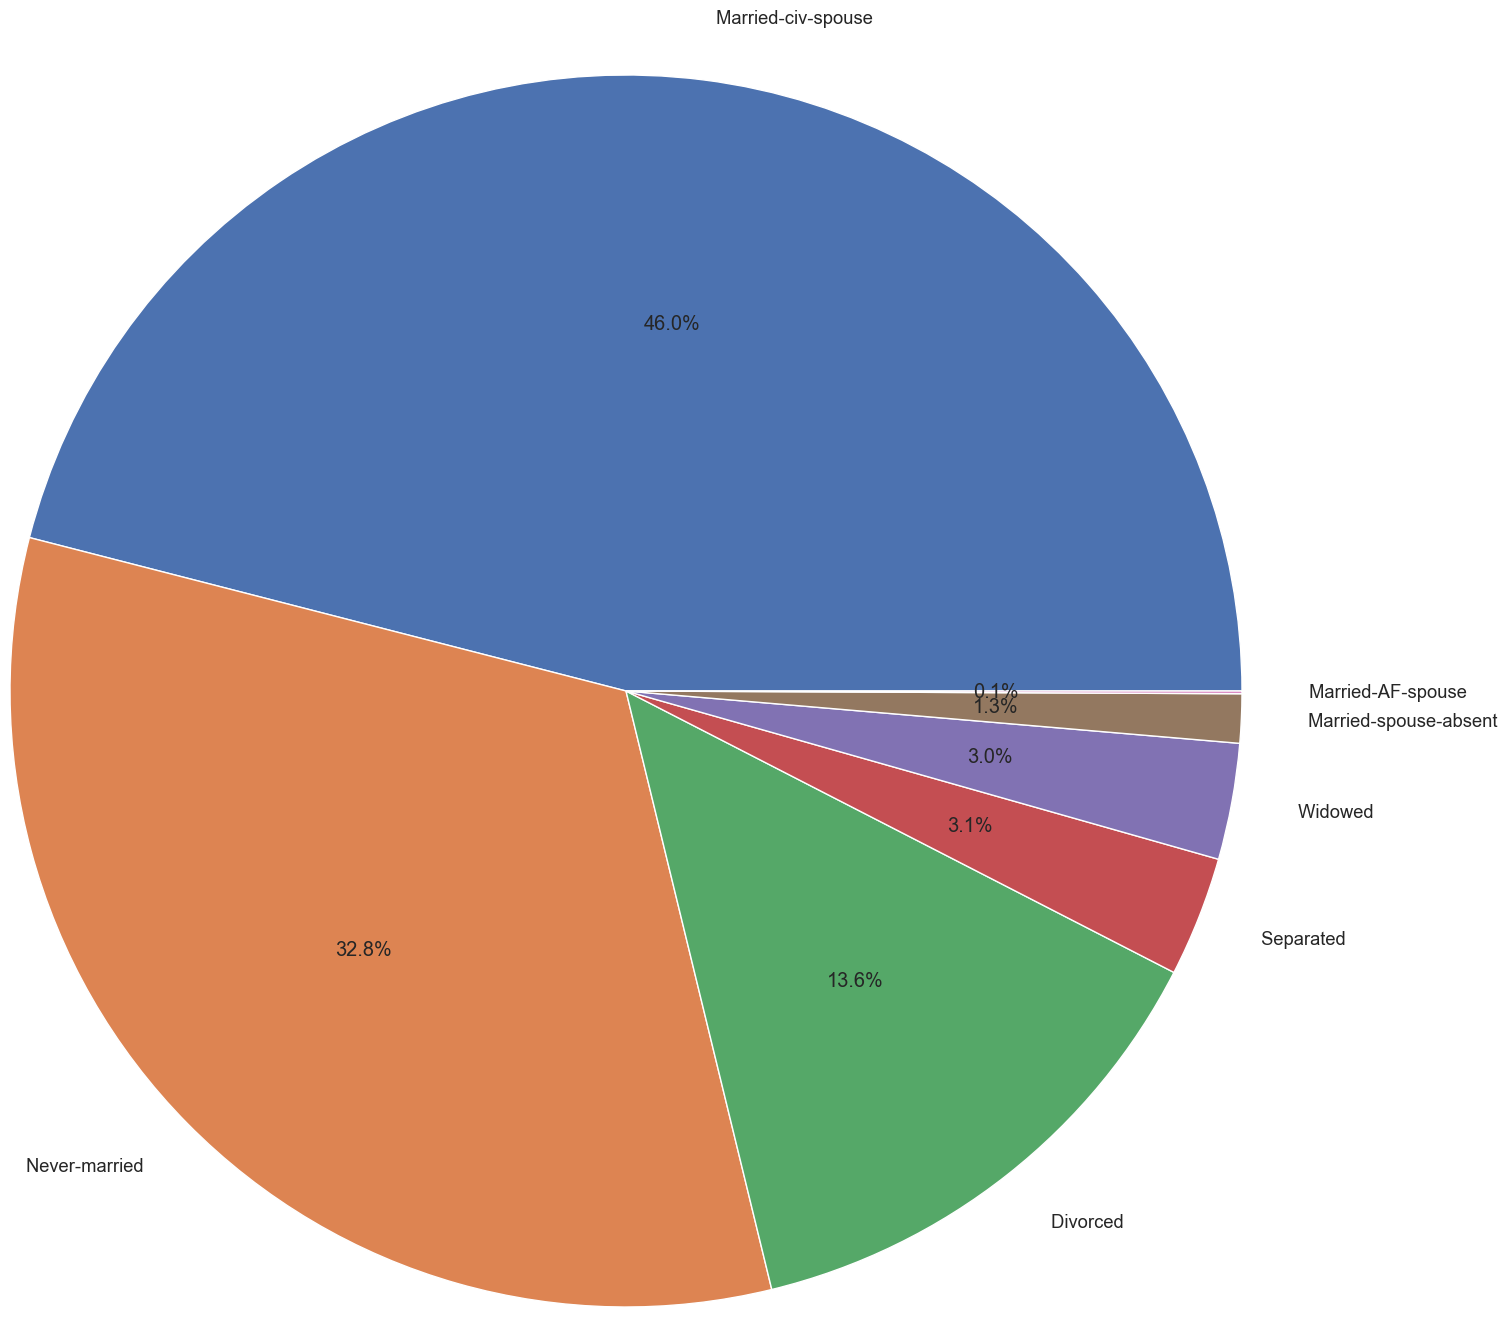

In [48]:
status = df1['marital-status'].value_counts().plot.pie(autopct='%1.1f%%', radius = 2)

In [49]:
print('\n --Value Counts-- \n')
print(df1['marital-status'].value_counts())


 --Value Counts-- 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


In [50]:
df1['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married' , inplace=True , regex = True)
df1['marital-status'].replace(['Divorced', 'Separated','Widowed', 'Married-spouse-absent' , 'Never-married'] , 'Not Married' , inplace=True , regex = True)

In [51]:
df1['marital-status'].value_counts()

 Not Married    17562
 Married        14999
Name: marital-status, dtype: int64

# OCCUPATION

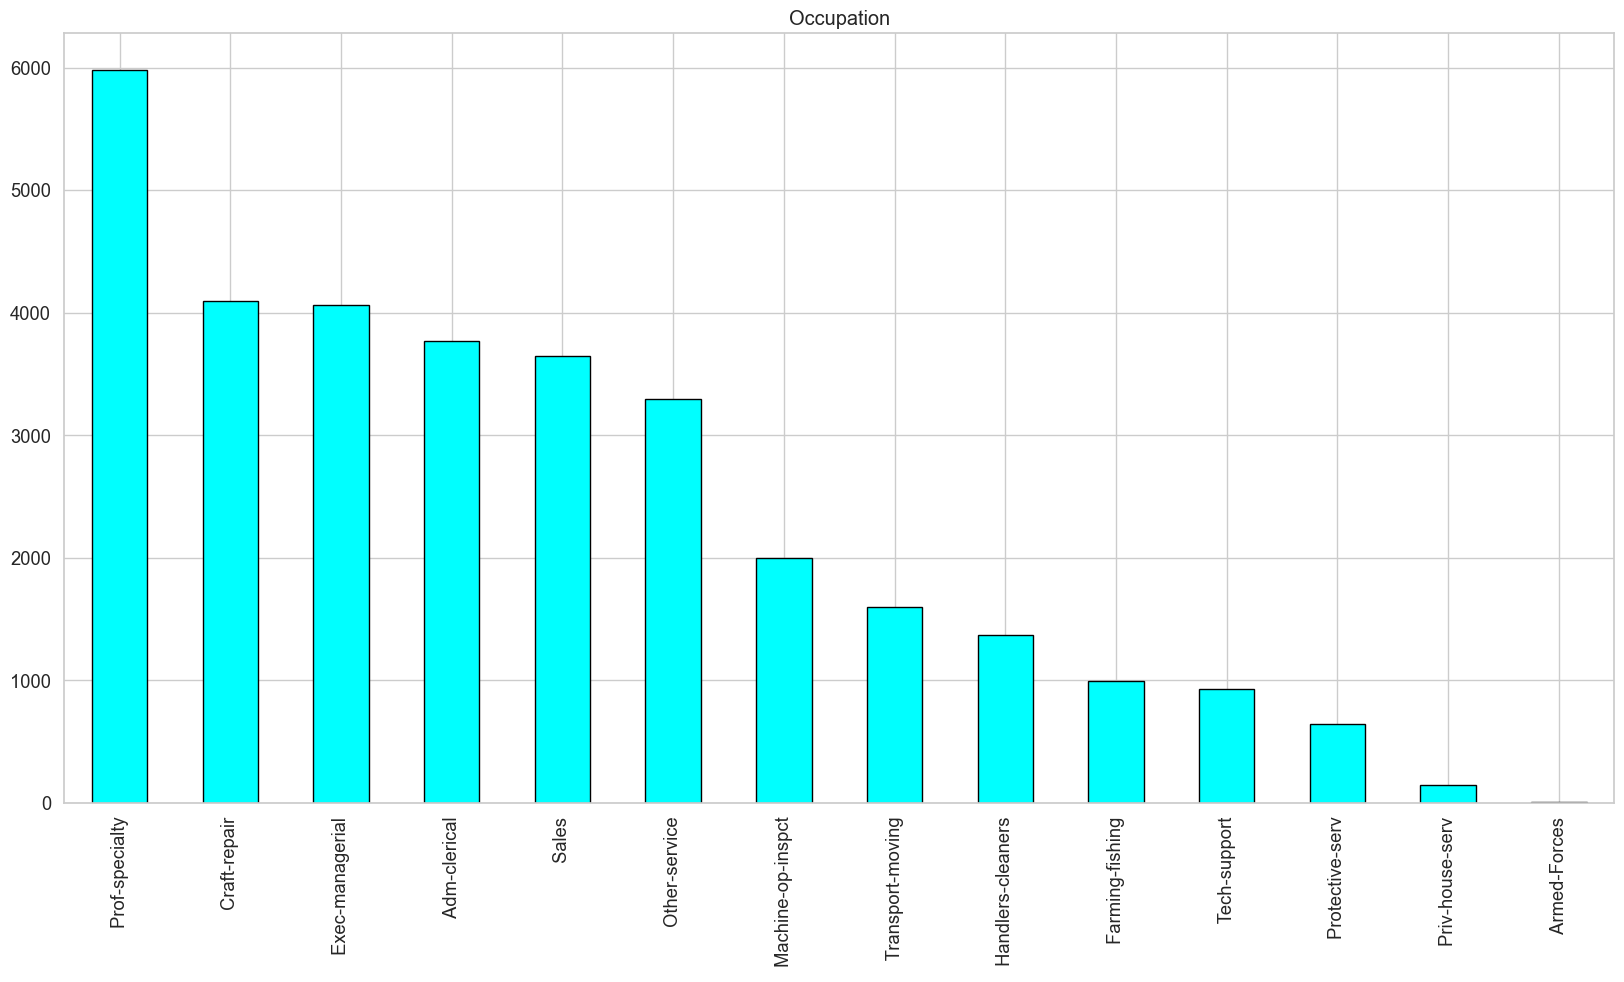

In [52]:
plt.figure(figsize=(20,10))
df1['occupation'].value_counts().plot(kind="bar", color = "cyan", edgecolor="black")
plt.title("Occupation")
plt.show()

# RELATIONSHIP

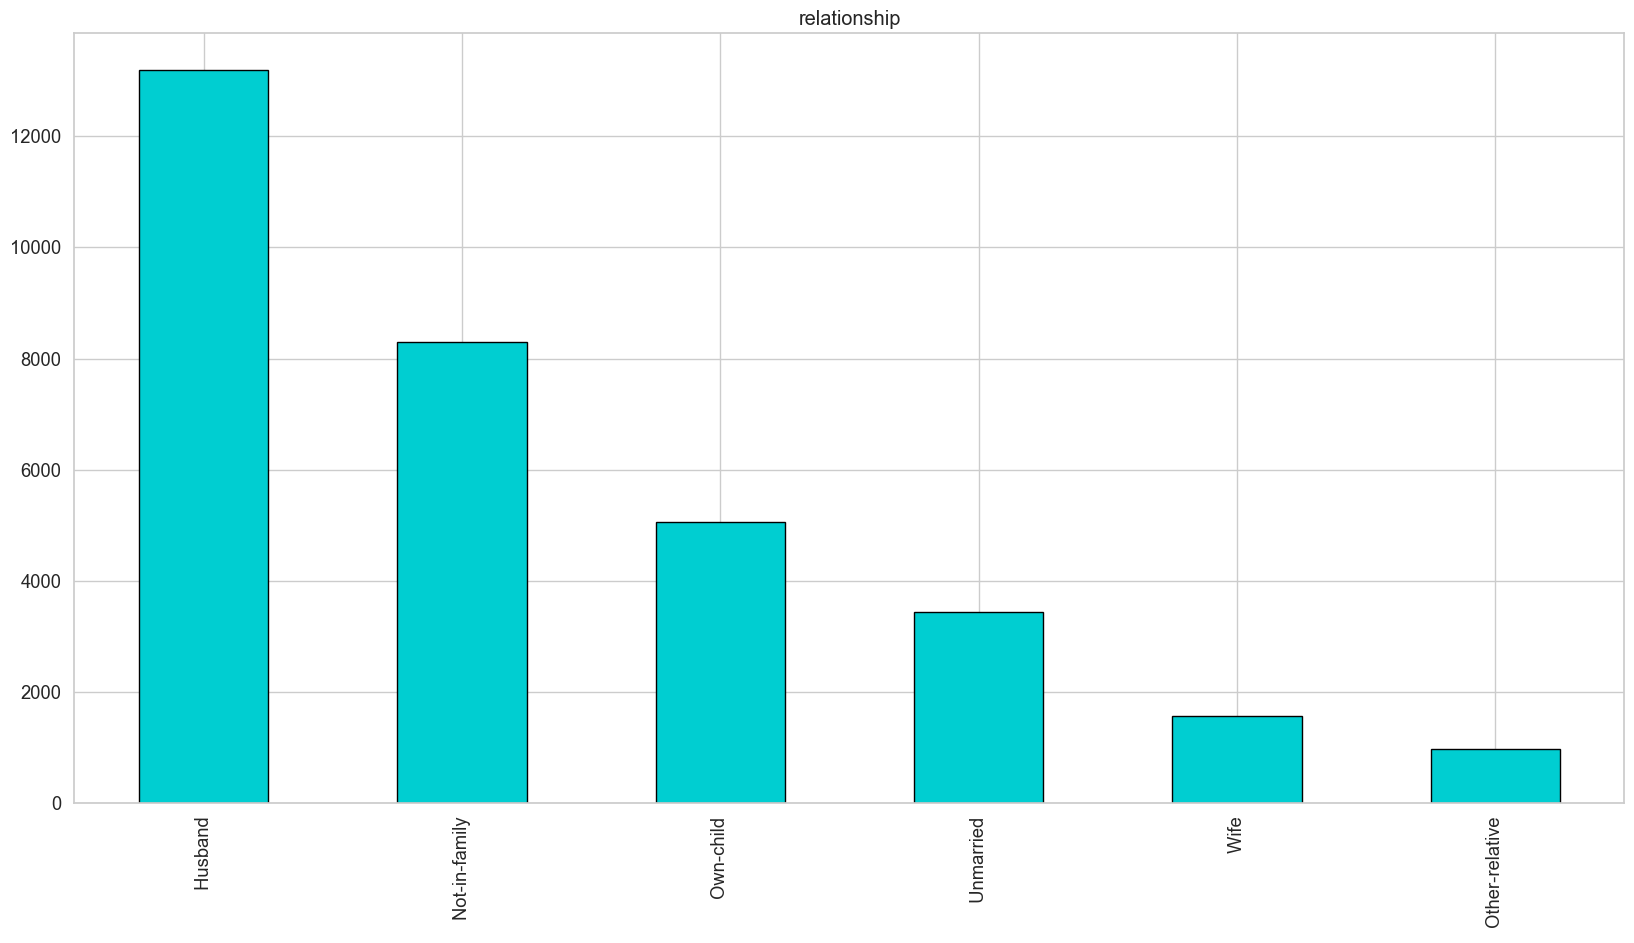

In [53]:
plt.figure(figsize=(20,10))
df1['relationship'].value_counts().plot(kind="bar", color = "darkturquoise", edgecolor="black")
plt.title("relationship")
plt.show()

Text(0.5, 1.0, 'Countplot for Relationship Per Class')

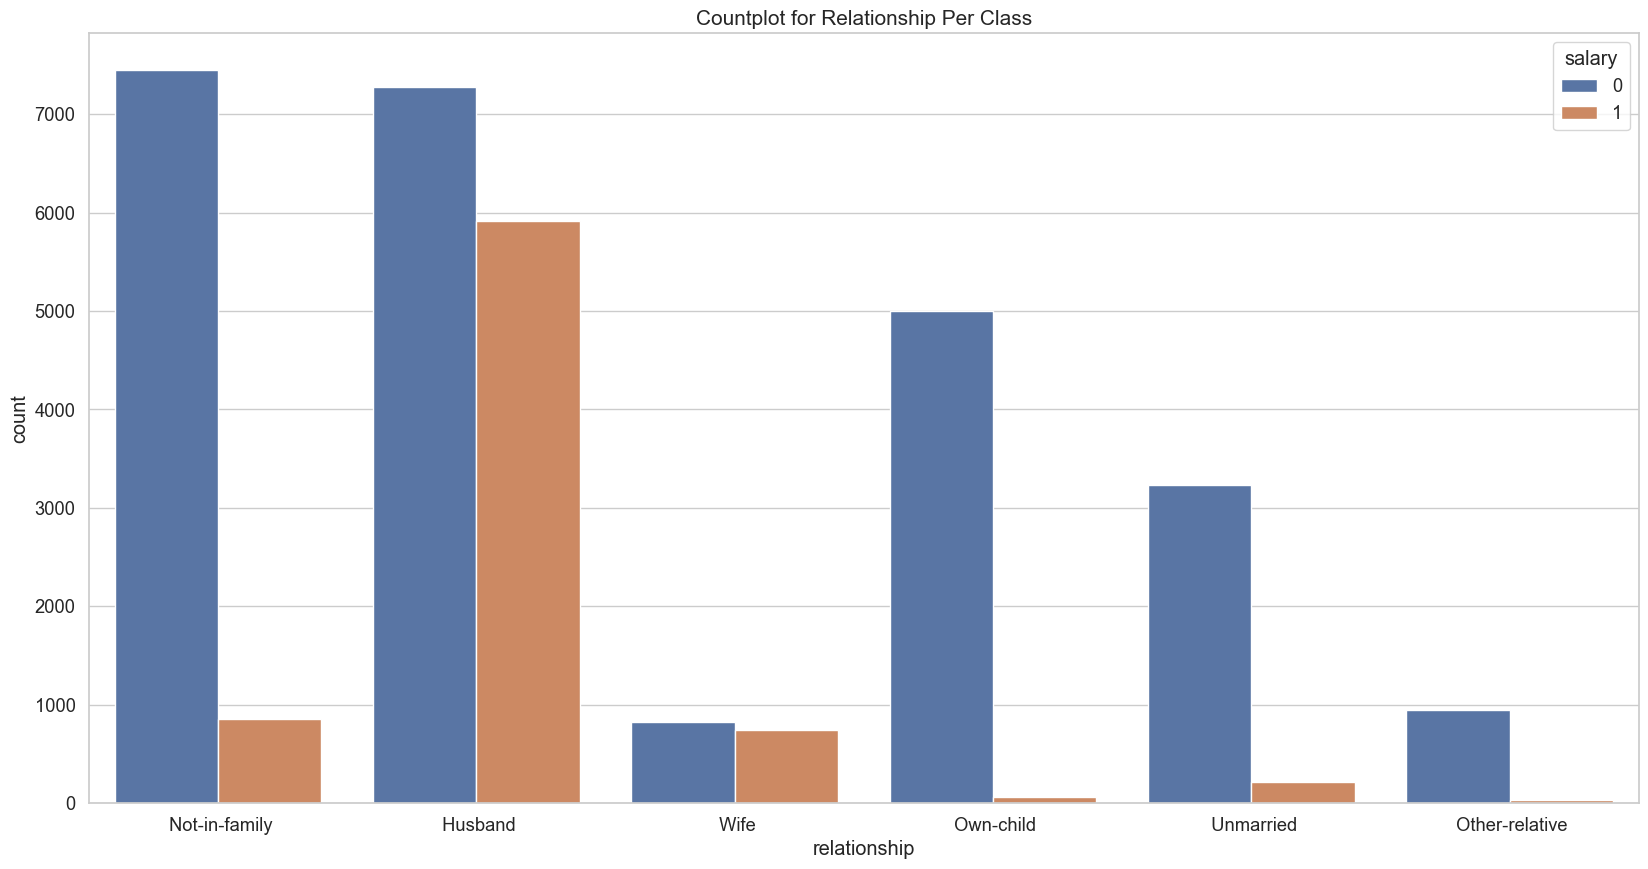

In [54]:
sns.countplot(x='relationship', data=df1, hue='salary')
plt.title("Countplot for Relationship Per Class", fontsize = 15)

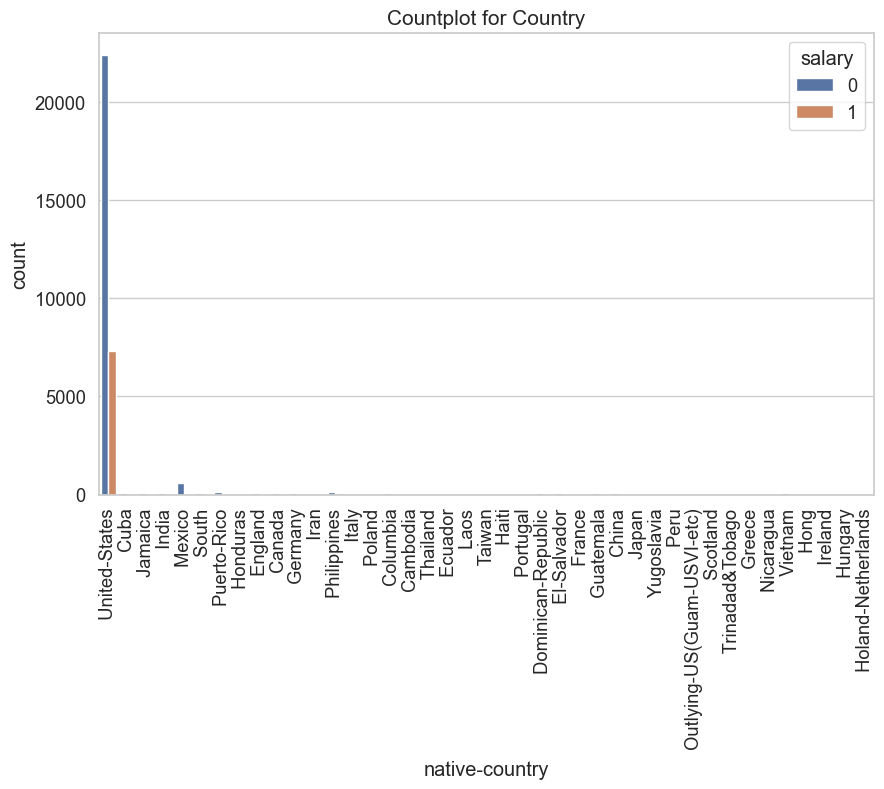

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x='native-country', data=df1, hue='salary')
plt.title("Countplot for Country", fontsize = 15)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.35)

In [56]:
print('\n --Value Counts-- \n')
print(df1['native-country'].value_counts())


 --Value Counts-- 

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France          

In [57]:
# Transforming native country column with value as either United States or Other.
countries = df1['native-country'].unique()[1:]
df1['native-country'] = df1['native-country'].replace(to_replace=countries, value='Other')

In [58]:
df1['native-country'].value_counts()

 United-States    29753
Other              2808
Name: native-country, dtype: int64

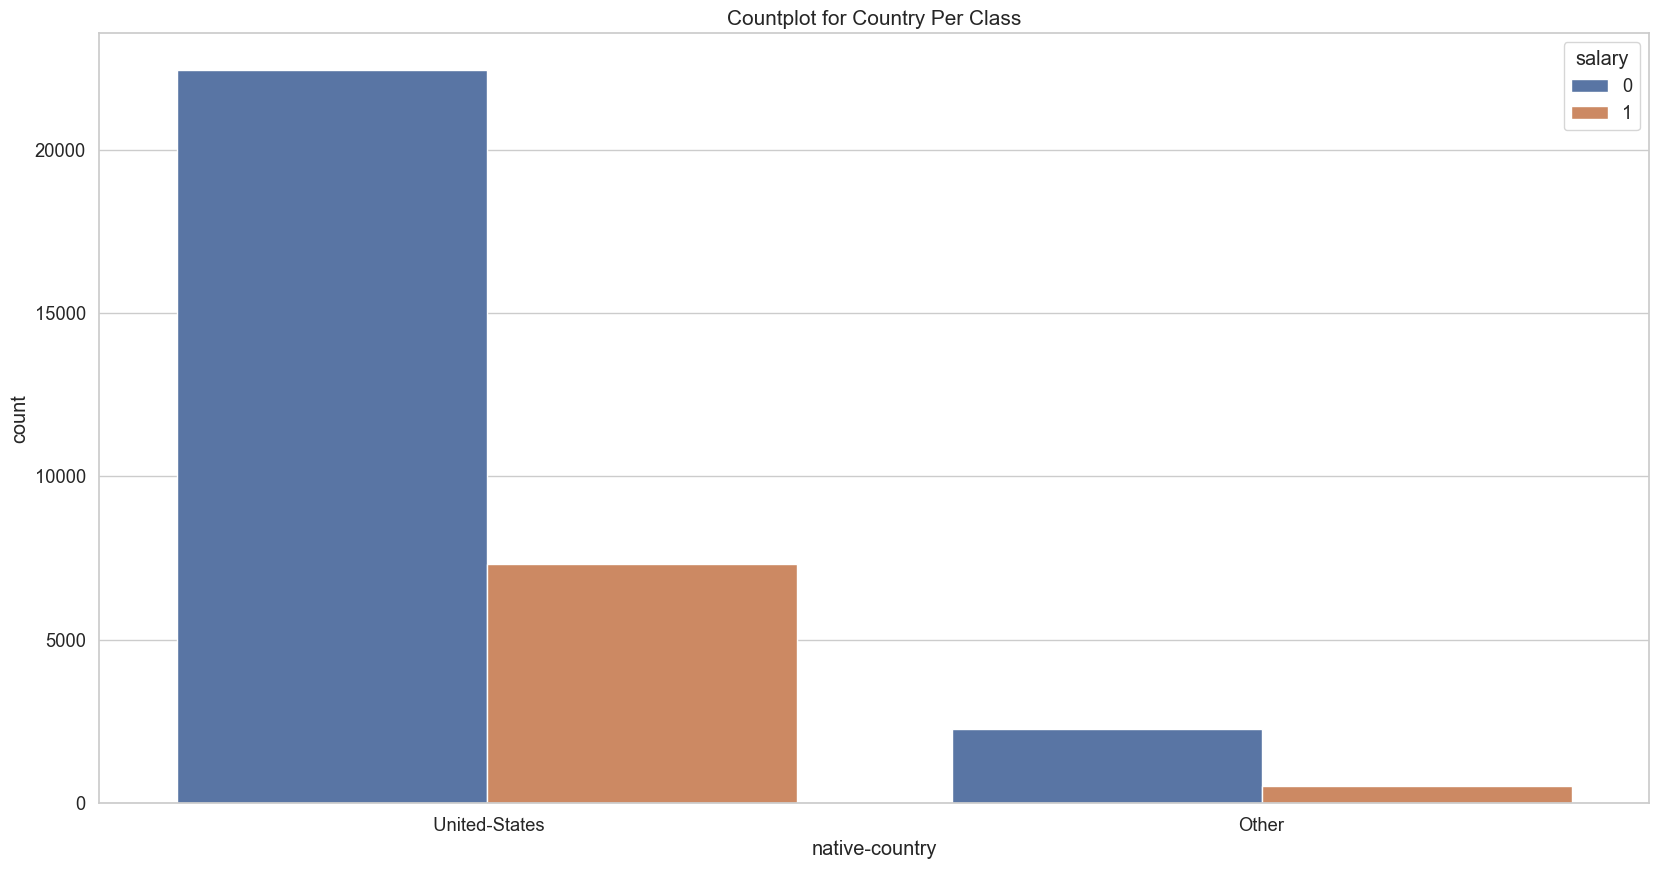

In [59]:
sns.countplot(data =df1 , x = 'native-country', hue = 'salary')
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.show()

In [60]:
df1.corr()

2023-03-24 10:52:59,961 [21328] WARNING  py.warnings:109: [JupyterRequire] C:\Users\ATHARV\AppData\Local\Temp\ipykernel_21328\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()



,age,workclass,fnlwgt,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,0.185318,-0.076646,0.077674,0.057775,0.068756,0.234037
workclass,0.185318,1.000000,-0.039292,0.070198,0.043279,0.134353,0.157102
fnlwgt,-0.076646,-0.039292,1.000000,0.000432,-0.010252,-0.018768,-0.009463
capital-gain,0.077674,0.070198,0.000432,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,0.043279,-0.010252,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,0.134353,-0.018768,0.078409,0.054256,1.000000,0.229689
salary,0.234037,0.157102,-0.009463,0.223329,0.150526,0.229689,1.000000


2023-03-24 10:52:59,982 [21328] WARNING  py.warnings:109: [JupyterRequire] C:\Users\ATHARV\AppData\Local\Temp\ipykernel_21328\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)



<AxesSubplot: >

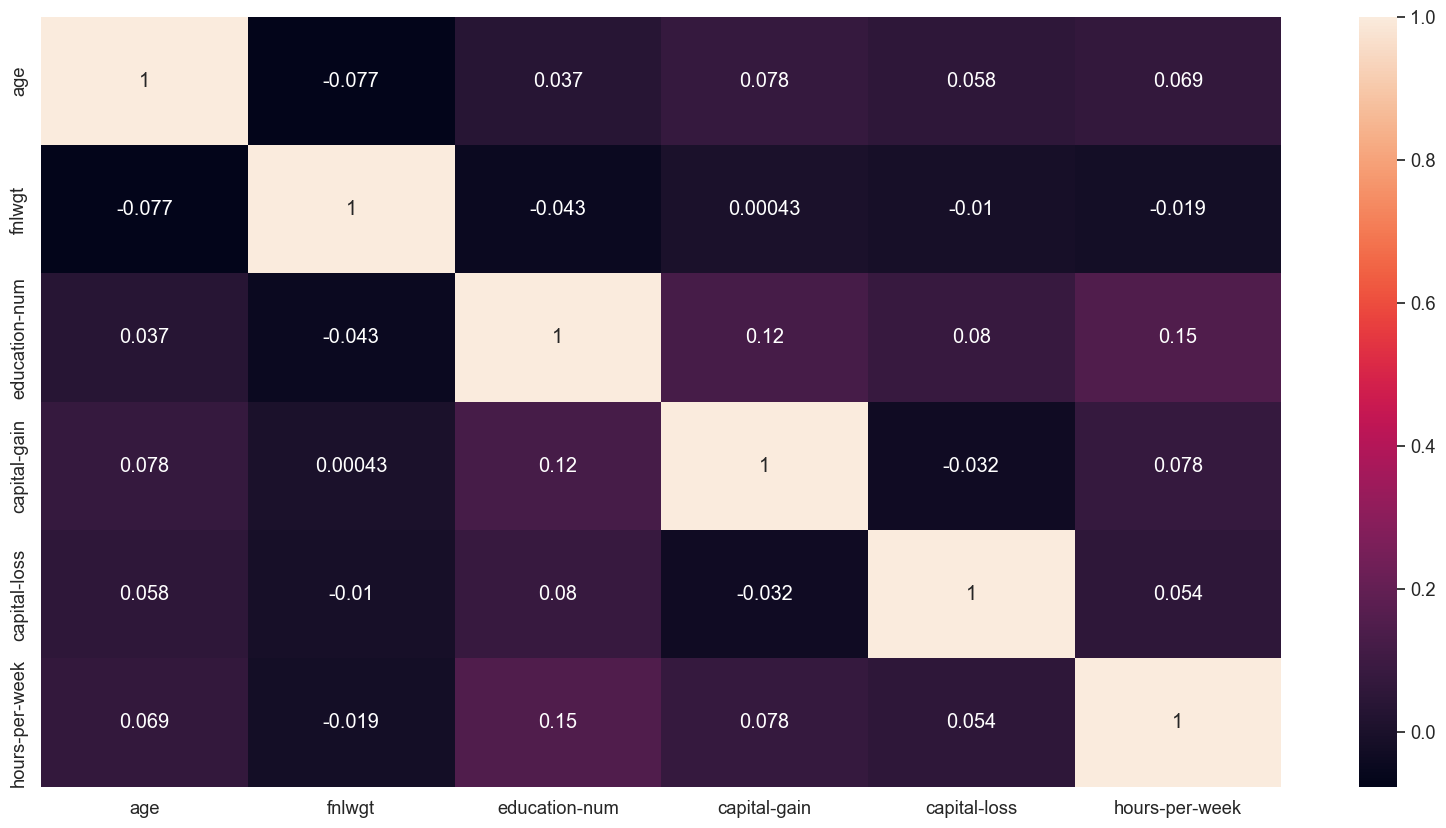

In [61]:
sns.heatmap(df.corr(),annot=True)

# Feature Selection 

In [62]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [65]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [63]:
df_objects = [col for col in df1 if df1[col].dtypes == 'object']
label_encoder = LabelEncoder()
df1[df_objects] = df1[df_objects].apply(label_encoder.fit_transform)

In [64]:
df1

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,3,77516,9,1,0,1,4,1,2174,0,40,0,0
1,50,4,83311,9,0,3,0,4,1,0,0,13,0,0
2,38,2,215646,11,1,5,1,4,1,0,0,40,0,0
3,53,2,234721,1,0,5,0,2,1,0,0,40,0,0
4,28,2,338409,9,0,9,5,2,0,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,0,12,5,4,0,0,0,38,0,0
32557,40,2,154374,11,0,6,0,4,1,0,0,40,0,1
32558,58,2,151910,11,1,0,4,4,0,0,0,40,0,0
32559,22,2,201490,11,1,0,3,4,1,0,0,20,0,0


In [66]:
X = df1.drop(['salary','fnlwgt'], axis = 1)
y = df1['salary']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sampled, y_sampled = smote.fit_resample(X, y)

# Model Building

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

In [70]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (22792, 12)
Shape of testing feature: (9769, 12)
Shape of training label: (22792,)
Shape of training label: (9769,)


# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [72]:
lr.fit(X_train,y_train)

2023-03-24 10:56:08,383 [21328] WARNING  py.warnings:109: [JupyterRequire] E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression()

In [73]:
y_pred_logistic= lr.predict(X_test)
y_pred_logistic

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
cm = confusion_matrix(y_test, y_pred_logistic)
cm

array([[7087,  330],
       [1639,  713]], dtype=int64)

In [75]:
df_log=pd.DataFrame(cm,columns=['>50K(TP)','<50K(FN)'],index=['>50K(FP)','<50K(TN)'])
df_log

,>50K(TP),<50K(FN)
>50K(FP),7087,330
<50K(TN),1639,713


In [76]:
accuracy_score(y_test,y_pred_logistic)*100

79.84440577336473

In [77]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7417
           1       0.68      0.30      0.42      2352

    accuracy                           0.80      9769
   macro avg       0.75      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [78]:
y_pred_train_lr = lr.predict(X_train)

In [79]:
print("-----Test Data Accuracy----")
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_logistic), 4))
print('F1 score:', round(f1_score(y_test, y_pred_logistic),4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_lr), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_lr), 4))

-----Test Data Accuracy----
Logistic Regression:
Accuracy score: 0.7984
F1 score: 0.42

-----Train Data Accuracy----
Accuracy score: 0.8008
F1 score: 0.418


# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf=RandomForestClassifier(n_estimators=30)

In [82]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [83]:
y_pred=rf.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [85]:
conf_rf=confusion_matrix(y_test,y_pred)

In [86]:
df_rf=pd.DataFrame(conf_rf,columns=['>50K(TP)','<50K(FN)'],index=['>50K(FP)','<50K(TN)'])
df_rf

,>50K(TP),<50K(FN)
>50K(FP),6866,551
<50K(TN),915,1437


In [87]:
accuracy_score(y_test,y_pred)*100

84.99334629951889

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7417
           1       0.72      0.61      0.66      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.85      9769



In [90]:
y_pred_train_rfc = rf.predict(X_train)

In [91]:
print("-----Test Data Accuracy----")
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred), 4))
print('F1 score:', round(f1_score(y_test, y_pred), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_rfc), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_rfc), 4))

-----Test Data Accuracy----
Random Forest Classifier:
Accuracy score: 0.8499
F1 score: 0.6622

-----Train Data Accuracy----
Accuracy score: 0.9772
F1 score: 0.9521


# XG BOOST

In [92]:
from xgboost import XGBClassifier

In [93]:
xgb=XGBClassifier(n_estimators=10)   

In [94]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [95]:
y_pred_xg=xgb.predict(X_test)

In [96]:
conf_xg=confusion_matrix(y_test,y_pred_xg)
conf_xg

array([[7075,  342],
       [1014, 1338]], dtype=int64)

In [97]:
df_xg=pd.DataFrame(conf_xg,columns=['>50K(TP)','<50K(FN)'],index=['>50K(FP)','<50K(TN)'])
df_xg

,>50K(TP),<50K(FN)
>50K(FP),7075,342
<50K(TN),1014,1338


In [98]:
accuracy_score(y_test,y_pred_xg)*100

86.11935715016891

In [99]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7417
           1       0.80      0.57      0.66      2352

    accuracy                           0.86      9769
   macro avg       0.84      0.76      0.79      9769
weighted avg       0.86      0.86      0.85      9769



In [100]:
y_pred_train_xgb = xgb.predict(X_train)

In [101]:
print("-----Test Data Accuracy----")
print('XGB Classifier:')
print('Accuracy score:',round(accuracy_score(y_test, y_pred_xg), 4))
print('F1 score:',round(f1_score(y_test, y_pred_xg), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:',round(accuracy_score(y_train, y_pred_train_xgb), 4))
print('F1 score:',round(f1_score(y_train, y_pred_train_xgb), 4))

-----Test Data Accuracy----
XGB Classifier:
Accuracy score: 0.8612
F1 score: 0.6637

-----Train Data Accuracy----
Accuracy score: 0.8661
F1 score: 0.6744


# XG BOOST HYPER_PARAMETER TUNING

In [102]:
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

classifier=XGBClassifier()
random_search = RandomizedSearchCV(classifier,
                                 param_distributions=params,
                                 n_iter=5, n_jobs=-1,cv=5,verbose=3)

In [103]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [104]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [105]:
xgb_tune = XGBClassifier(random_state=0,min_child_weight=1,max_depth= 4,
                    learning_rate = 0.15,gamma= 0.1,
                    colsample_bytree= 0.5)
xgb_tune.fit(X_train,y_train)
y_pred_xgb_tune = xgb_tune.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [107]:
print("-----Test Data Accuracy----")
print('Gradient Boosting Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb_tune), 3))
print('F1 score:', round(f1_score(y_test, y_pred_xgb_tune), 2))

-----Test Data Accuracy----
Gradient Boosting Classifier:
Accuracy score: 0.871
F1 score: 0.7


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [109]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('XGB',XGBClassifier()),
]

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy score for this model
    print(f'{name}: {accuracy}')

2023-03-24 10:59:44,624 [21328] WARNING  py.warnings:109: [JupyterRequire] E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression: 0.7984440577336472
Decision Tree: 0.8162555020984748
Random Forest: 0.8525949431876344
SVM: 0.8014126317944519
XGB: 0.8727607738765483


# ANALYZING RESULT

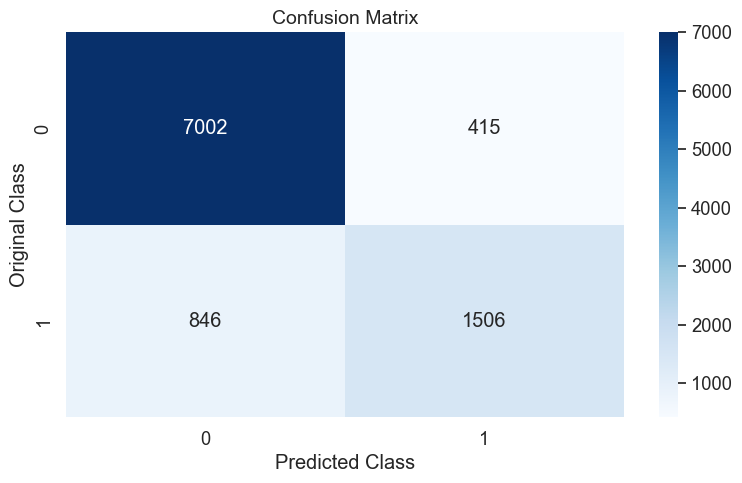

In [110]:
# Plot confusion matrix
plt.figure(figsize=[9,5])
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tune), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize = 14)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_tune))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7417
           1       0.78      0.64      0.70      2352

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769

